# Step - 1 Bussiness problem Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step -2 Data Understanding

## data collection

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\11. Regression\\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

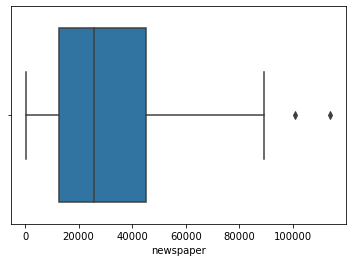

In [3]:
sns.boxplot(df.newspaper)

In [4]:
from feature_engine.outliers import Winsorizer

In [5]:
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables='newspaper')
df['newspaper']=win.fit_transform(df[['newspaper']])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newspaper'>

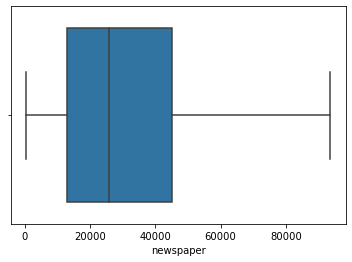

In [6]:
sns.boxplot(df.newspaper)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    int64  
 1   radio      200 non-null    int64  
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [8]:
df['total_spend']= df.TV + df.radio + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200.0,22100,337100.0
1,44500,39300,45100.0,10400,128900.0
2,17200,45900,69300.0,9300,132400.0
3,151500,41300,58500.0,18500,251300.0
4,180800,10800,58400.0,12900,250000.0


In [9]:
df.drop(columns=['TV','radio','newspaper'],inplace = True)
df.head()

,sales,total_spend
0,22100,337100.0
1,10400,128900.0
2,9300,132400.0
3,18500,251300.0
4,12900,250000.0


# Step - 3 Data Preprocessing

## Exploratory data Analysis (EDA)

In [10]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200722.250000
std,5217.456566,92886.856859
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,204900.000000
75%,17400.000000,281125.000000
max,27000.000000,426325.000000


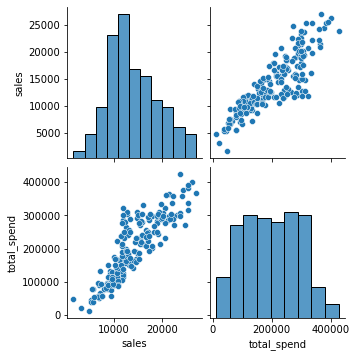

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.corr()

,sales,total_spend
sales,1.000000,0.868215
total_spend,0.868215,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_spend'>

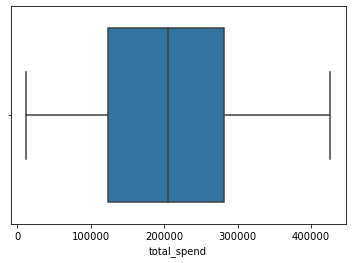

In [13]:
sns.boxplot(df.total_spend)

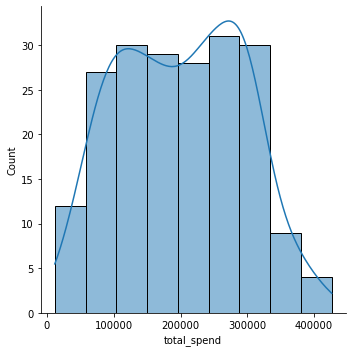

In [14]:
sns.displot(df.total_spend,kde=True)
plt.show()

In [15]:
df.total_spend.skew()

0.04686520739900662

## 3.2- data cleaning

In [16]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_spend'>

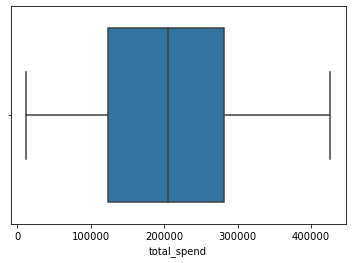

In [17]:
sns.boxplot(df.total_spend)

In [18]:
df.total_spend.skew()

0.04686520739900662

## 3.3 - data Wrangling

In [19]:
# no encoding required

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms=MinMaxScaler()

df['total_spend1'] = mms.fit_transform(df[['total_spend']])

In [23]:
sc=StandardScaler()

df['total_spend'] = sc.fit_transform(df[['total_spend']])

In [24]:
df.head()

,sales,total_spend,total_spend1
0,22100,1.471898,0.784806
1,10400,-0.775163,0.282665
2,9300,-0.737388,0.291106
3,18500,0.545876,0.577872
4,12900,0.531845,0.574736


# 3.4 - Train test split

In [25]:
X= df.drop(columns=['sales','total_spend1'])
y = df['sales']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# Step - 4 : Modeling

In [28]:
from  sklearn.linear_model import LinearRegression

In [29]:
# save the model
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.fit(X_test,y_test)

LinearRegression()

In [32]:
# calculate the bita not value
model.intercept_

13992.360346749045

In [33]:
# colculate bita1 value or slop
model.coef_

array([4461.95534243])

## prediction

In [34]:
train_prediction=model.predict(X_train)

In [35]:
test_prediction=model.predict(X_test)

# Step - 5 : Evaluation

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
print('MAE for train data', mean_absolute_error(y_train,train_prediction))
print('MAE for test data', mean_absolute_error(y_test,test_prediction))

MAE for train data 1973.215831752617
MAE for test data 1889.5373273121315


In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
print('MSE for train data', mean_squared_error(y_train,train_prediction))
print('MSE for test data', mean_squared_error(y_test,test_prediction))

MSE for train data 6812282.651011475
MSE for test data 6346999.872572433


In [40]:
print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

RMSE for train data 2610.03499038068
RMSE for test data 2519.325281215674


In [41]:
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))

R2 for train data 0.7403953824079553
R2 for test data 0.767548400801485


In [42]:
# test R-square
model.score(X_test,y_test)

0.767548400801485

In [43]:
# train R-square
model.score(X_train,y_train)

0.7403953824079553

# Checklist 

- 1. check wheather model has overfitting or underfitting
- 2. is test accuracy = cross validation score
- 3. check model meets the bussiness problem requirement
- 4. finally save the model and share to deployment team

## 1. is model has overfitting or underfitting problem

## answer - is is good model

## 2. test accuracy = cross validation score

In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)

cv_scores=scores.mean()

[0.75332067 0.79544003 0.76534088 0.74881394 0.65903234]


In [45]:
print('cross validation score :' ,cv_scores)

cross validation score : 0.7443895704502623


# check assumptions 

**1 - Linearity of errors**

In [46]:
test_res = y_test-test_prediction

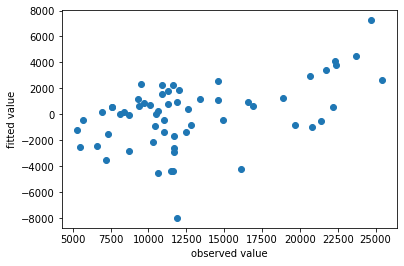

In [47]:
plt.scatter(y_test,test_res)
plt.xlabel('observed value')
plt.ylabel('fitted value')
plt.show()

**2 - Normality of Errors** 

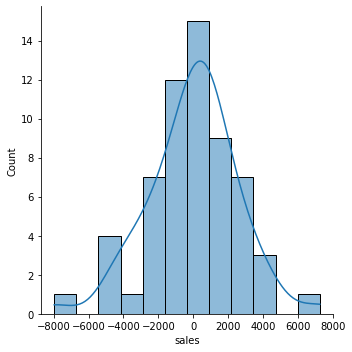

In [48]:
sns.displot(test_res,kde=True)
plt.show()

**3 - Equal variance of errors (Homoscadesicity)**

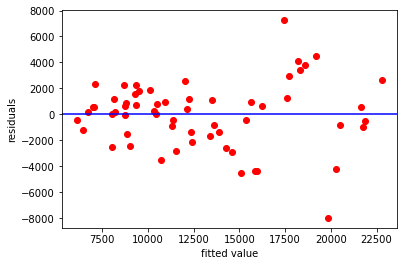

In [49]:
plt.scatter(test_prediction,test_res, c='r')
plt.axhline(y=0, color='blue')
plt.xlabel('fitted value')
plt.ylabel('residuals')
plt.show()

**4 - variables significance ( independent)**

In [50]:
import statsmodels.formula.api as smf
model2= smf.ols('y~X',data=df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     606.2
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.56e-62
Time:                        14:17:43   Log-Likelihood:                -1855.1
No. Observations:                 200   AIC:                             3714.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.402e+04    183.520     76.408      0.000    1.37e+04    1.44e+04
X           4518.5347    183.520     24.621      0.000    4156.629    4880.440
==============================================================================
Omnibus:                        7.298   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.221
Skew:                          -0.385   Prob(JB):                       0.0270
Kurtosis:                       3.524   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step - 6 : Final Inferences

In [51]:
# use model to make prediction on a new value

model.predict([[200000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.92405061e+08])

# save a Model

In [52]:
from joblib import dump

In [53]:
dump(model,' sales_model1.joblib')

[' sales_model1.joblib']

# Load a Model

In [54]:
from joblib import load

In [55]:
pwd

'C:\\Users\\deepp'

In [56]:
loaded_model= load(' sales_model1.joblib')

In [57]:
loaded_model=load('C:\\Users\\deepp\\ sales_model1.joblib')

In [58]:
loaded_model.predict([[200000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.92405061e+08])